# This notebook is for specific results from the SV3 ELG sample, focusing on HIP

In [1]:
import numpy as np
import fitsio
from matplotlib import pyplot as plt
import os

In [2]:
ff = fitsio.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/LSScats/test/ELG_HIPAlltiles_full.dat.fits')

total number of unique reachable ELG_HIP targets is 283066
total number of unique observed ELG_HIP targets is 167460
total number of unique ELG_HIP targets with good redshifts is 134202
targeting completeness is 0.591593479965803
redshift success rate is 0.8013973486205661


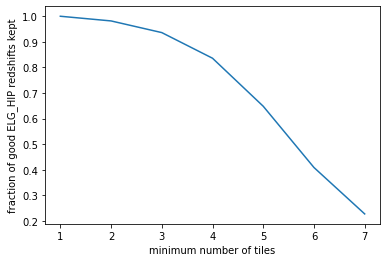

In [3]:
print('total number of unique reachable ELG_HIP targets is '+str(len(ff)))
wo = ff['LOCATION_ASSIGNED'] == 1
print('total number of unique observed ELG_HIP targets is '+str(len(ff[wo])))
wz = ff['ZWARN'] == 0
print('total number of unique ELG_HIP targets with good redshifts is '+str(len(ff[wz])))
print('targeting completeness is '+str(len(ff[wo])/len(ff)))
print('redshift success rate is '+str(len(ff[wz])/len(ff[wo])))
ngl = [len(ff[wz])]
ntm = [1]
for nt in range(1,7):
    wt = ff['NTILE'] > nt
    ntm.append(nt+1)
    ngl.append(len(ff[wz&wt]))
plt.plot(ntm,np.array(ngl)/len(ff[wz]))
plt.xlabel('minimum number of tiles')
plt.ylabel('fraction of good ELG_HIP redshifts kept')
plt.show()


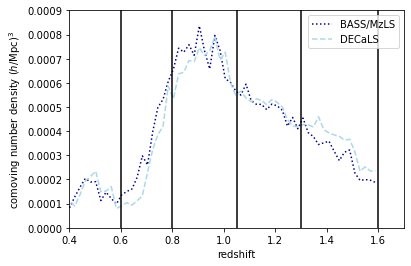

In [4]:
#plot n(z)
nz = np.loadtxt('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/LSScats/test/ELG_HIP_N_nz.dat').transpose()
plt.plot(nz[0],nz[3],':',color='darkblue',label='BASS/MzLS')
nz = np.loadtxt('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/LSScats/test/ELG_HIP_S_nz.dat').transpose()
plt.plot(nz[0],nz[3],'--',color='lightblue',label='DECaLS')
plt.legend()
plt.xlim(0.4,1.7)
plt.ylim(0,0.0009)
xl = [0.32,0.32]
yl = [0,0.001]
plt.plot(xl,yl,'k-')
xl = [0.6,0.6]
yl = [0,0.001]
plt.plot(xl,yl,'k-')
xl = [0.8,0.8]
yl = [0,0.001]
plt.plot(xl,yl,'k-')
xl = [1.05,1.05]
yl = [0,0.001]
plt.plot(xl,yl,'k-')
xl = [1.3,1.3]
yl = [0,0.001]
plt.plot(xl,yl,'k-')
xl = [1.6,1.6]
yl = [0,0.001]
plt.plot(xl,yl,'k-')
plt.xlabel('redshift')
plt.ylabel(r'comoving number density ($h$/Mpc)$^3$')
plt.show()

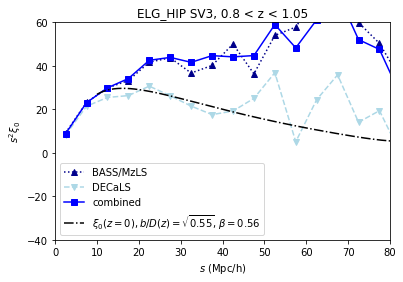

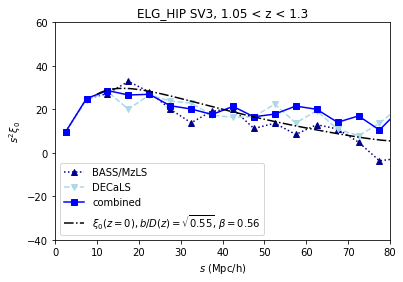

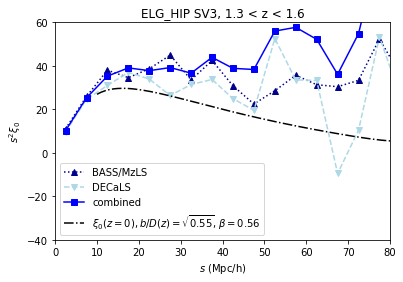

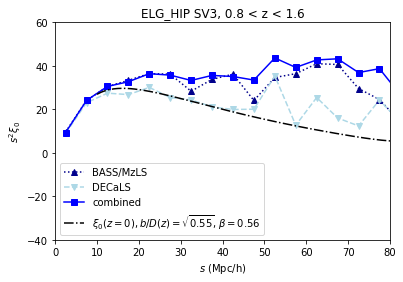

In [7]:
zl = zl = [0.8,1.05,1.3,1.6]
for i in range(0,len(zl)):
    if i == len(zl)-1:
        zmin=zl[0]
        zmax=zl[-1]
    else:
        zmin = zl[i]
        zmax = zl[i+1]

    xils = np.loadtxt('/global/cscratch1/sd/ajross/SV3xi/xi024SV3_testELG_HIP_S'+str(zmin)+str(zmax)+'5st0.dat').transpose()
    xil = np.loadtxt('/global/cscratch1/sd/ajross/SV3xi/xi024SV3_testELG_HIP'+str(zmin)+str(zmax)+'5st0.dat').transpose()
    xiln = np.loadtxt('/global/cscratch1/sd/ajross/SV3xi/xi024SV3_testELG_HIP_N'+str(zmin)+str(zmax)+'5st0.dat').transpose()
    plt.plot(xil[0],xil[0]**2.*xiln[1],'^:',color='darkblue',label='BASS/MzLS')
    plt.plot(xil[0],xil[0]**2.*xils[1],'v--',color='lightblue',label='DECaLS')
    plt.plot(xil[0],xil[0]**2.*xil[1],'s-b',label='combined')
    xilin = np.loadtxt(os.environ['HOME']+'/BAOtemplates/xi0Challenge_matterpower0.563.04.07.015.00.dat').transpose()
    plt.plot(xilin[0],xilin[0]**2.*xilin[1]*.55,'k-.',label=r'$\xi_{\rm 0}(z=0),b/D(z)=\sqrt{0.55},\beta=0.56$')

    plt.title('ELG_HIP SV3, '+str(zmin)+' < z < '+str(zmax))
    plt.xlim(0,80)
    plt.ylim(-40,60)
    plt.xlabel(r'$s$ (Mpc/h)')
    plt.ylabel(r'$s^2\xi_0$')
    plt.legend()
    plt.show()

## This actually looks really good. Probably some issues with n(z) variation in BASS/MzLS, especially at z < 1.05